내장 데이터셋 iris  


In [67]:
library(corrgram)
library(psych)
iris_data = iris
source('../utils/util.r')


데이터 준비 및 확인

In [68]:
display_info(iris_data)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...
-------------------------------------------------------------------------


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

데이터 전처리

In [87]:
cat('num of na:',sum(is.na(iris_data)))

num of na: 0

데이터 분포 형태 체크

In [70]:
print(apply(iris_data,2,get_mode)[i])

 Species 
"setosa" 


In [71]:
for(i in 1:5){
    print(apply(iris_data,2,get_mode)[i])
}

Sepal.Length 
       "5.0" 
Sepal.Width 
      "3.0" 
Petal.Length 
       "1.4" 
Petal.Width 
      "0.2" 
 Species 
"setosa" 


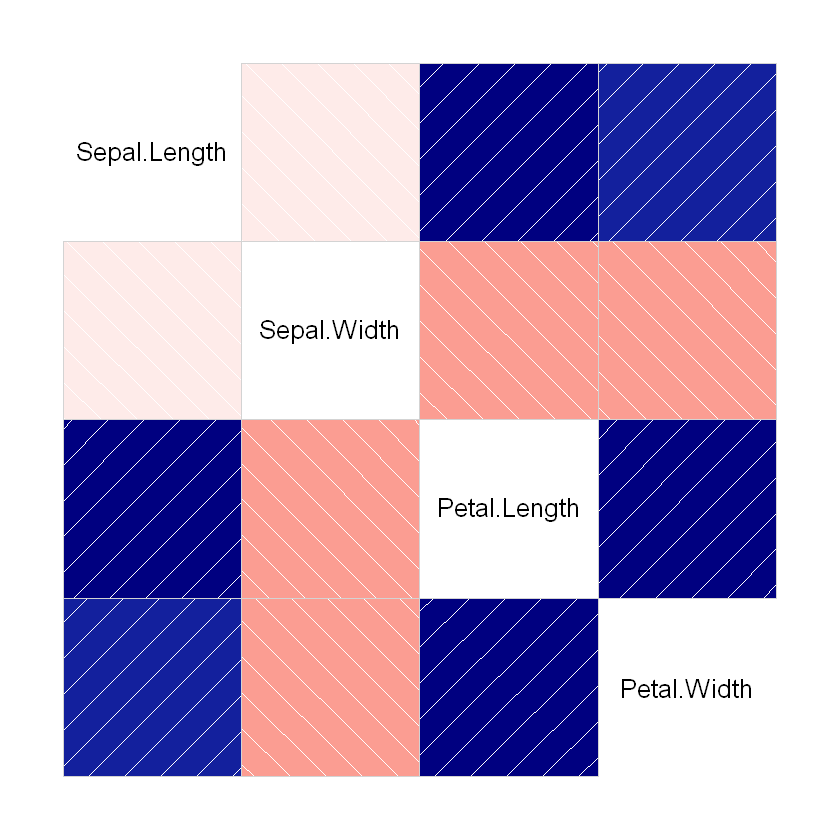

In [72]:
corrgram(iris_data)

In [78]:
corr.test(iris_data[-5])

Call:corr.test(x = iris_data[-5])
Correlation matrix 
             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length         1.00       -0.12         0.87        0.82
Sepal.Width         -0.12        1.00        -0.43       -0.37
Petal.Length         0.87       -0.43         1.00        0.96
Petal.Width          0.82       -0.37         0.96        1.00
Sample Size 
[1] 150
Probability values (Entries above the diagonal are adjusted for multiple tests.) 
             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length         0.00        0.15            0           0
Sepal.Width          0.15        0.00            0           0
Petal.Length         0.00        0.00            0           0
Petal.Width          0.00        0.00            0           0

 To see confidence intervals of the correlations, print with the short=FALSE option

산점도 확인

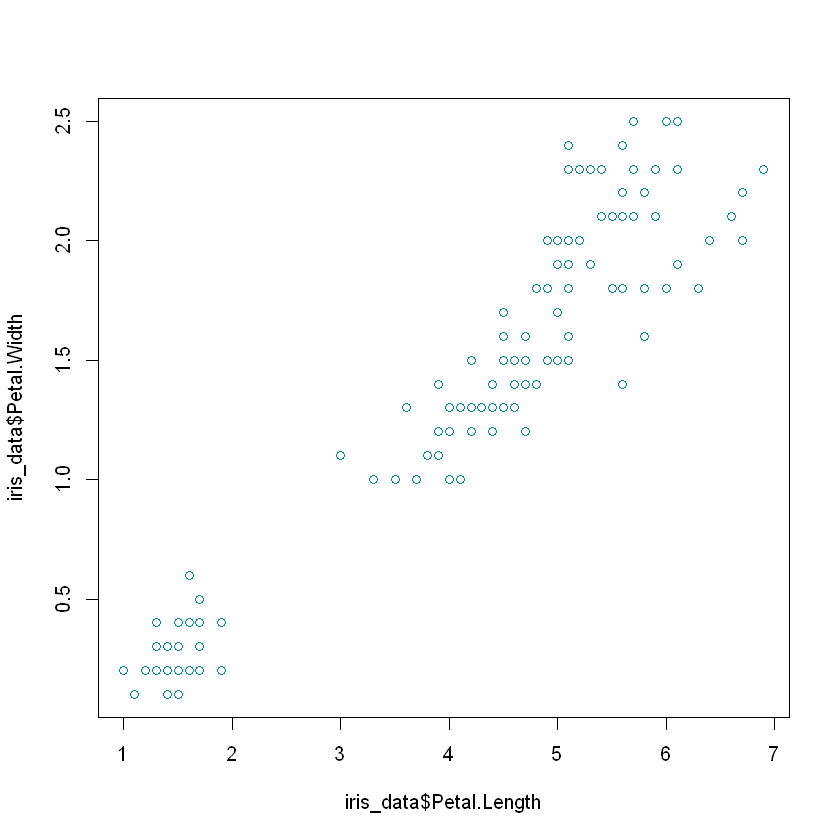

In [73]:
plot(iris_data$Petal.Width~iris_data$Petal.Length,col='cyan4')

In [74]:
shapiro.test(iris_data$Petal.Width)
shapiro.test(iris_data$Petal.Length)


	Shapiro-Wilk normality test

data:  iris_data$Petal.Width
W = 0.90183, p-value = 1.68e-08



	Shapiro-Wilk normality test

data:  iris_data$Petal.Length
W = 0.87627, p-value = 7.412e-10


In [75]:
cor(iris_data$Petal.Width,iris_data$Petal.Length,method='k')

[1] 0.8068907

독립변수 종속변수 선택  
independent variable: Petal.Length  
dependent variable: Petal.Width  

선형회귀식 도출 및 결과 출력

In [76]:
model = lm(Petal.Width~Petal.Length,data=iris_data)

In [65]:
model


Call:
lm(formula = Petal.Width ~ Petal.Length, data = iris_data)

Coefficients:
 (Intercept)  Petal.Length  
     -0.3631        0.4158  


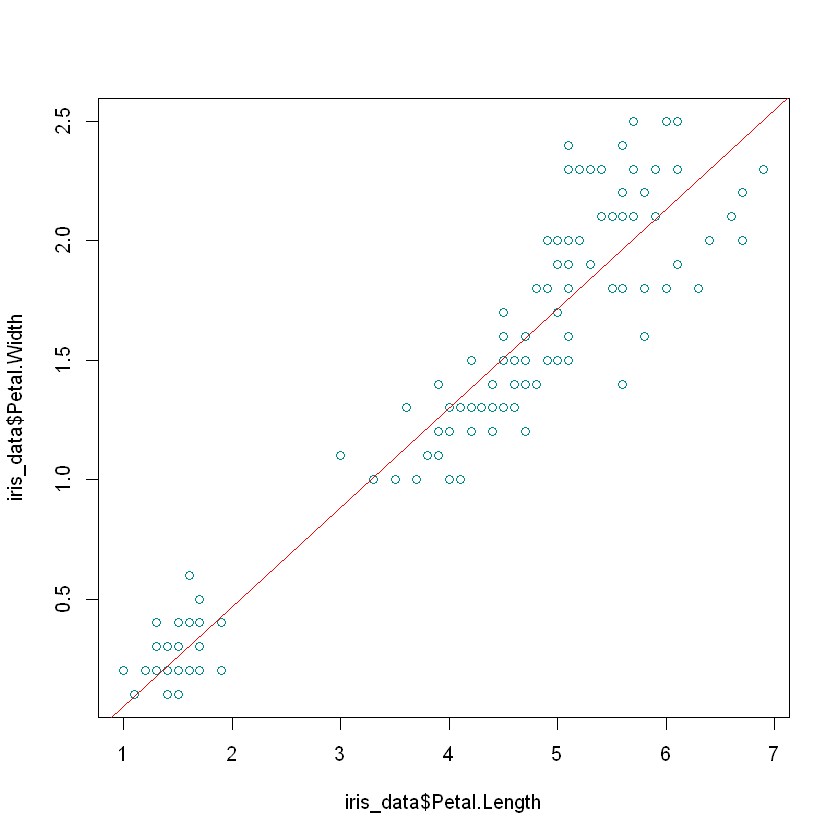

In [66]:
plot(iris_data$Petal.Width~iris_data$Petal.Length,col='cyan4')
abline(model,col='red')

In [79]:
summary(model)


Call:
lm(formula = Petal.Width ~ Petal.Length, data = iris_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56515 -0.12358 -0.01898  0.13288  0.64272 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.363076   0.039762  -9.131  4.7e-16 ***
Petal.Length  0.415755   0.009582  43.387  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2065 on 148 degrees of freedom
Multiple R-squared:  0.9271,	Adjusted R-squared:  0.9266 
F-statistic:  1882 on 1 and 148 DF,  p-value: < 2.2e-16


In [83]:
slope=coef(model)[2]
interept = coef(model)[1]

In [86]:
slope
interept

Petal.Length 
   0.4157554

(Intercept) 
 -0.3630755